In [2]:
import os
%pylab inline


import matplotlib.pyplot as plt



import numpy as np
from astropy.io import fits
from astropy.table import Table
import desispec.io
import desisim.io
from desisim.scripts import quickgen
from desispec.scripts import group_spectra




Populating the interactive namespace from numpy and matplotlib


/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Environment variables and data

We will specify the enviroment variables, specially where to find the DESI spectra templates, and where do we want to save the simulated spectra. Then check enviroment variables. I assumes the desi enviroment is already set. 

In [2]:
def check_env():
    for env in ('DESIMODEL', 'DESI_ROOT', 'DESI_SPECTRO_SIM', 'DESI_SPECTRO_DATA', 
            'DESI_SPECTRO_REDUX', 'SPECPROD', 'PIXPROD'):
        if env in os.environ:
            print('{} environment set to {}'.format(env, os.getenv(env)))
        else:
            print('Required environment variable {} not set!'.format(env))
            

%set_env SPECPROD=alxogm/Julien
rawdata_dir = desisim.io.simdir()
%set_env DESI_SPECTRO_DATA=/project/projectdirs/desi/users/jguy/sim2017/sim/month
%set_env DESI_SPECTRO_SIM=/project/projectdirs/desi/users/jguy/sim2017/sim
%set_env PIXPROD=month

check_env()


print('Simulated raw data will be written to {}'.format(desisim.io.simdir()))
print('Pipeline will read raw data from {}'.format(desispec.io.rawdata_root()))
print('    (without knowing that it was simulated)')
print('Pipeline will write processed data to {}'.format(desispec.io.specprod_root()))

env: SPECPROD=alxogm/Julien
env: DESI_SPECTRO_DATA=/project/projectdirs/desi/users/jguy/sim2017/sim/month
env: DESI_SPECTRO_SIM=/project/projectdirs/desi/users/jguy/sim2017/sim
env: PIXPROD=month
DESIMODEL environment set to /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master
DESI_ROOT environment set to /global/project/projectdirs/desi
DESI_SPECTRO_SIM environment set to /project/projectdirs/desi/users/jguy/sim2017/sim
DESI_SPECTRO_DATA environment set to /project/projectdirs/desi/users/jguy/sim2017/sim/month
DESI_SPECTRO_REDUX environment set to /global/project/projectdirs/desi/spectro/redux
SPECPROD environment set to alxogm/Julien
PIXPROD environment set to month
Simulated raw data will be written to /project/projectdirs/desi/users/jguy/sim2017/sim/month/
Pipeline will read raw data from /project/projectdirs/desi/users/jguy/sim2017/sim/month
    (without knowing that it was simulated)
Pipeline will write processed data to /global/project/projectdirs/desi/spectr

Now that the fiber and simspec files were generated we proceed to simulate de spectra using quickgen function.
NOTE: The quickspectra function is in github, but for some reason I can not see it from my instalation, I'll check if it is available in  NERSC. 

In [12]:
'''Uncomment this lines if you want to use the fibermap and simspec files generated in advance '''
night=20191019
expid=3937
simspec_path='/project/projectdirs/desi/users/jguy/sim2017/sim/month/'
fiberfile = desispec.io.findfile('fibermap', night=night, expid=expid)
simspecfile = desisim.io.findfile('simspec', night=night, expid=expid)
print(fiberfile)
print(simspecfile)

/project/projectdirs/desi/users/jguy/sim2017/sim/month/20191019/fibermap-00003937.fits
/project/projectdirs/desi/users/jguy/sim2017/sim/month/20191019/simspec-00003937.fits


In [13]:
'''Uncomment this lines if you want to plot the redshift distribution generated by the previous result of 
a new_exposure function, otherwise just  plot the distribution in the next cell'''
print('Reading fibermap file {}'.format(fiberfile))
hdu = fits.open(fiberfile)      
fibermap = Table(hdu['FIBERMAP'].data)
hdu.close()
print('Reading simspec file {}.'.format(simspecfile))
hdu = fits.open(simspecfile)
meta = Table(hdu['TRUTH'].data)

hdu.close()

Reading fibermap file /project/projectdirs/desi/users/jguy/sim2017/sim/month/20191019/fibermap-00003937.fits
Reading simspec file /project/projectdirs/desi/users/jguy/sim2017/sim/month/20191019/simspec-00003937.fits.


(-0.2, 4.397836613655091)

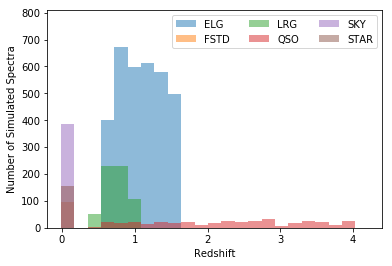

In [14]:
allobjtype = meta['OBJTYPE']
redlim = (-0.2, 1.1*meta['REDSHIFT'].max())
fig, ax = plt.subplots()
for objtype in sorted(set(allobjtype)):
    indx = objtype == allobjtype
    hh = ax.hist(meta['REDSHIFT'][indx], bins=25, 
                 label=objtype, alpha=0.5, range=redlim)
ax.set_xlabel('Redshift')
ax.set_ylabel('Number of Simulated Spectra')
ax.legend(loc='upper right', ncol=3)
ax.margins(0.2)
ax.set_xlim(redlim)

In [ ]:
#outdir_truth option seems not to work... 
args = quickgen.parse([
    '--simspec', simspecfile,
    '--fibermap', fiberfile,
    '--outdir-truth', desisim.io.simdir()])
quickgen.main(args)

We have genereted the simmulated spectra, before analyzing them with redrock, we group them in the brick format 

In [7]:
nside = 64
args = group_spectra.parse(['--hpxnside', '{}'.format(nside),'--nights','{}'.format(night)])
group_spectra.main(args)

INFO:group_spectra.py:74:main: Starting at Mon Dec  4 21:30:21 2017
INFO:group_spectra.py:75:main:   using raw dir /project/projectdirs/desi/users/jguy/sim2017/sim/month
INFO:group_spectra.py:76:main:   using spectro production dir /global/project/projectdirs/desi/spectro/redux/alxogm/Julien
INFO:group_spectra.py:197:main: Distributing 17 spectral groups among 1 processes
INFO:group_spectra.py:220:main:   (0000) Begin spectral group spectra-64-9236 at Mon Dec  4 21:30:32 2017


Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x2ba94af07730>
Traceback (most recent call last):
  File "/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/weakref.py", line 109, in remove
    def remove(wr, selfref=ref(self)):
KeyboardInterrupt


KeyboardInterrupt: 

TODO: I couldnt find the script to run redrock from the notebook. In the meantime it can be run from the terminal as in this example:

rrdesi --zbest zbest-64-12637.fits --output spectra-64-12637.h5 spectra-64-12637.fits -ncpu 10

NOTE: by default uses all CPU available, so we should limit it. For larger samples it is best to make a script to run rrdesi over the different bricks. 


    

In [105]:
zbestfile='/global/homes/a/alxogm/Lyalpha/spectra_sim/zbest.fits'
zbest = Table.read(zbestfile)
truthfile='/global/project/projectdirs/desi/spectro/redux/alxogm/test_Julien/truth.fits'
truth=Table.read(truthfile)


In [79]:
ztruth=truth[truth['TARGETID']==zbest['TARGETID'][0]]
for i in range(1,len(zbest)):
    tmp=truth[truth['TARGETID']==zbest['TARGETID'][i]]
    ztruth=vstack([ztruth,tmp])

Lets use the TARGETID's from zbest to look for them in the fibermap to get the true REDSHIFT and SPECTYPE of such sources. We save that in  the ztruth table.

Now we make the histogram of sources at a given redshift for both the sources in zbest, and fibermap. Ideally these should look like the same. 

zbest results from Redrock on /global/homes/a/alxogm/Lyalpha/spectra_sim/zbest.fits
QSO : 116.0
QSO : 205.0


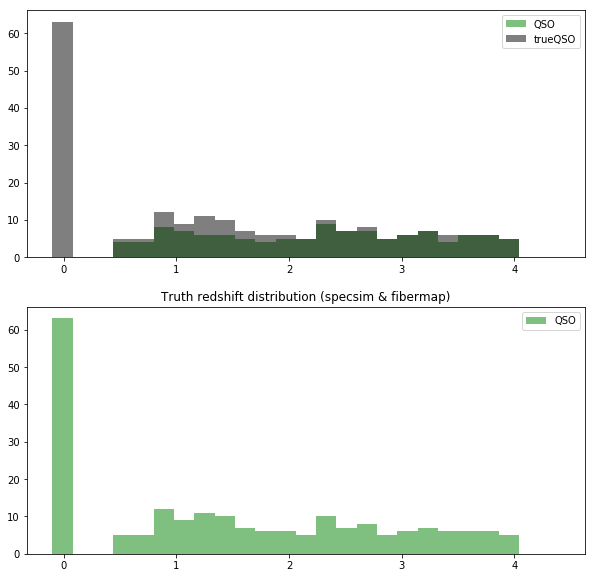

In [8]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

print('zbest results from Redrock on {}'.format(zbestfile))
for spectype in sorted(set(zbest['SPECTYPE'])):
    if spectype=='STAR':
        color='orangered'
    if spectype=='GALAXY':
        color='b'
    if spectype=='QSO':
        color='g'
        jj = (zbest['SPECTYPE'] == spectype)
   #print(spectype,':',sum(hist(zbest['Z'][jj], 25, (-0.1,4.4))[0]))
        nhist=ax[0].hist(zbest['Z'][jj], 25, (-0.1,4.4),color=color,label=format(spectype),alpha=0.5)[0]
        print(spectype,':',sum(nhist))

allobjtype = truth['OBJTYPE']

for objtype in sorted(set(allobjtype)):
    if objtype=='ELG':
        color='b'
    if objtype=='SKY':
        color='orangered'
    if objtype=='QSO':
        color='green'

        ii = (ztruth['OBJTYPE'] == objtype)
    #if objtype=='QSO':
        ax[0].hist(ztruth['TREDSHIFT'][ii],25,(-0.1,4.4),color='black',label='true'+format(objtype),alpha=0.5)[0]
    
        nhist=ax[1].hist(ztruth['TREDSHIFT'][ii],25,(-0.1,4.4),color=color,label=format(objtype),alpha=0.5)[0]
        print(objtype,':',sum(nhist))
ax[1].set_title('Truth redshift distribution (specsim & fibermap)')
fig.subplots_adjust(hspace=0.2)
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

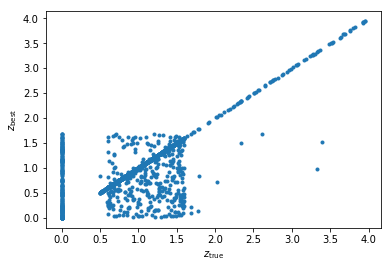

In [104]:
scatter(ztruth['TREDSHIFT'],zbest['Z'],marker='.')
ylabel(r'$z_{\rm best}$')
xlabel(r'$z_{\rm true}$')

/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


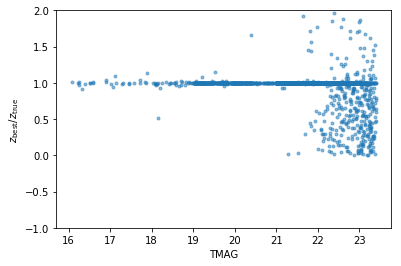

In [100]:
zth=np.reshape(ztruth['TREDSHIFT'],len(zbest['Z']))
mag_g =ztruth['TMAG']
diff=zbest['Z']/zth
scatter(mag_g,diff,marker='.',alpha=0.5)
ylim(-1,2)
ylabel(r'$z_{\rm best}/z_{\rm true}$')
xlabel('TMAG')